In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


In [15]:
ts = pd.read_csv("Train_SU63ISt.csv")
tss = pd.to_datetime(ts.Datetime,format='%d-%m-%Y %H:%M')
ts.index = tss
ts = ts.resample('D').mean()
ts.head()

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


In [27]:
ts["year"] = ts.index.year
ts['day'] = ts.index.day
ts["month"] = ts.index.month
ts['day_name'] = ts.index.weekday_name
ts.head()

,ID,Count,year,day,month,day_name
Datetime,,,,,,
2012-08-25,11.5,3.166667,2012,25,8,Saturday
2012-08-26,35.5,3.666667,2012,26,8,Sunday
2012-08-27,59.5,2.583333,2012,27,8,Monday
2012-08-28,83.5,2.416667,2012,28,8,Tuesday
2012-08-29,107.5,2.500000,2012,29,8,Wednesday


<Figure size 1152x504 with 0 Axes>

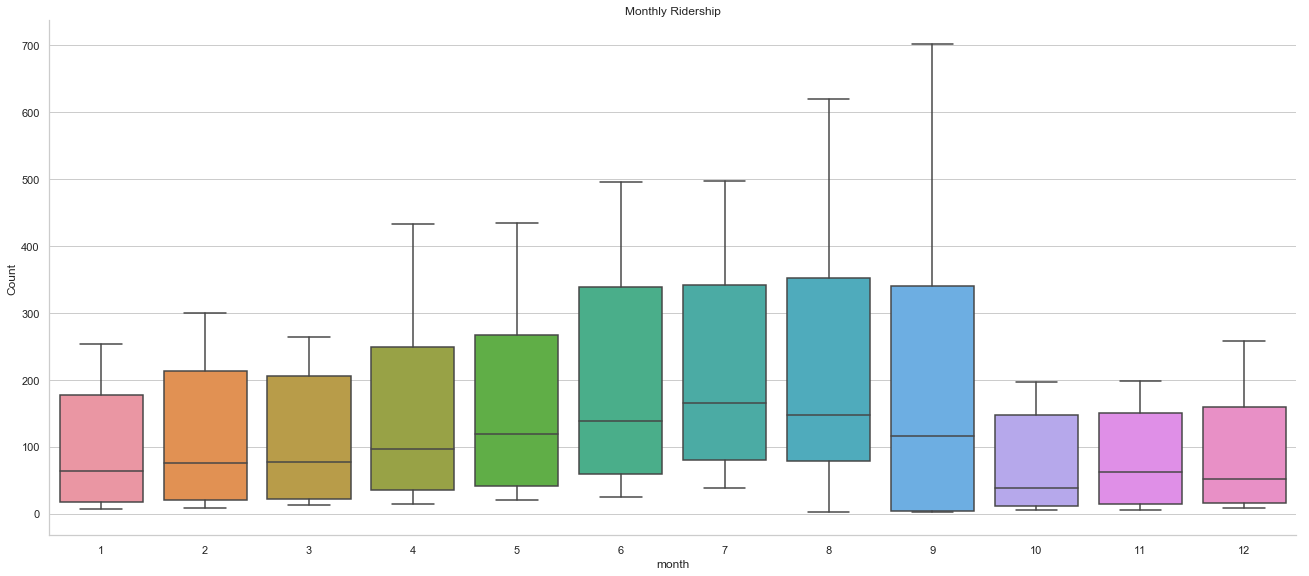

In [25]:
plt.figure(figsize=(16, 7))
sns.catplot(x="month", y="Count", data=ts, kind="box", height=8, aspect=float(16/7))
plt.xlabel("month")
plt.ylabel("Count")
plt.title("Monthly Ridership")

plt.show()

C:\Users\bhara\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


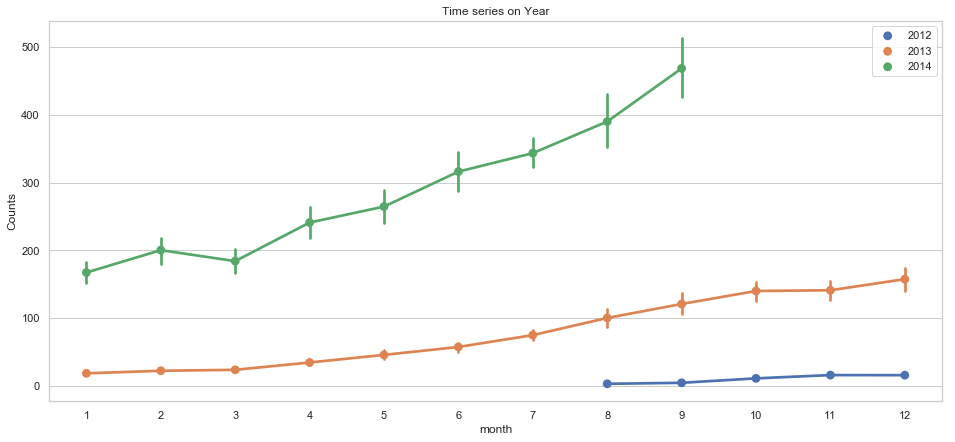

In [26]:
plt.figure(figsize=(16, 7))
sns.pointplot(x="month", y="Count", hue="year", data=ts, x_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("month")
plt.ylabel("Counts")
plt.title("Time series on Year")
plt.legend(loc='upper right')

Text(0.5,1,'Time Series')

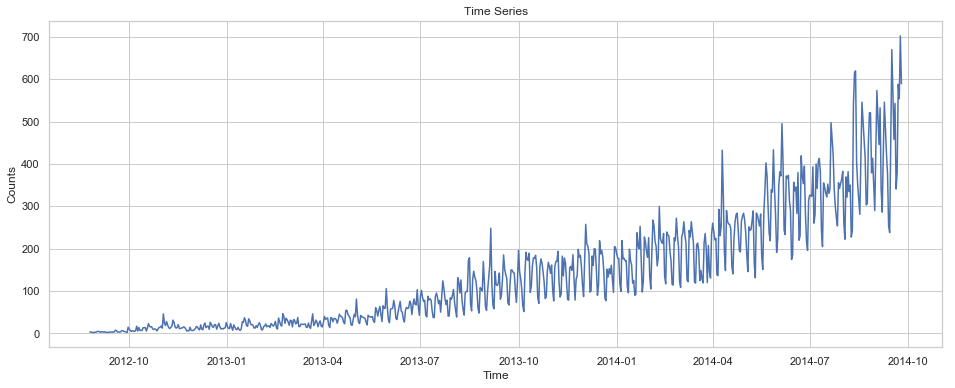

In [28]:
plt.figure(figsize=(16, 6))
plt.plot(ts.index, ts["Count"])
#plt.plot(range(ts.shape[0]),ts.Count)
plt.xlabel("Time")
plt.ylabel("Counts")
plt.title("Time Series")

<Figure size 1152x504 with 0 Axes>

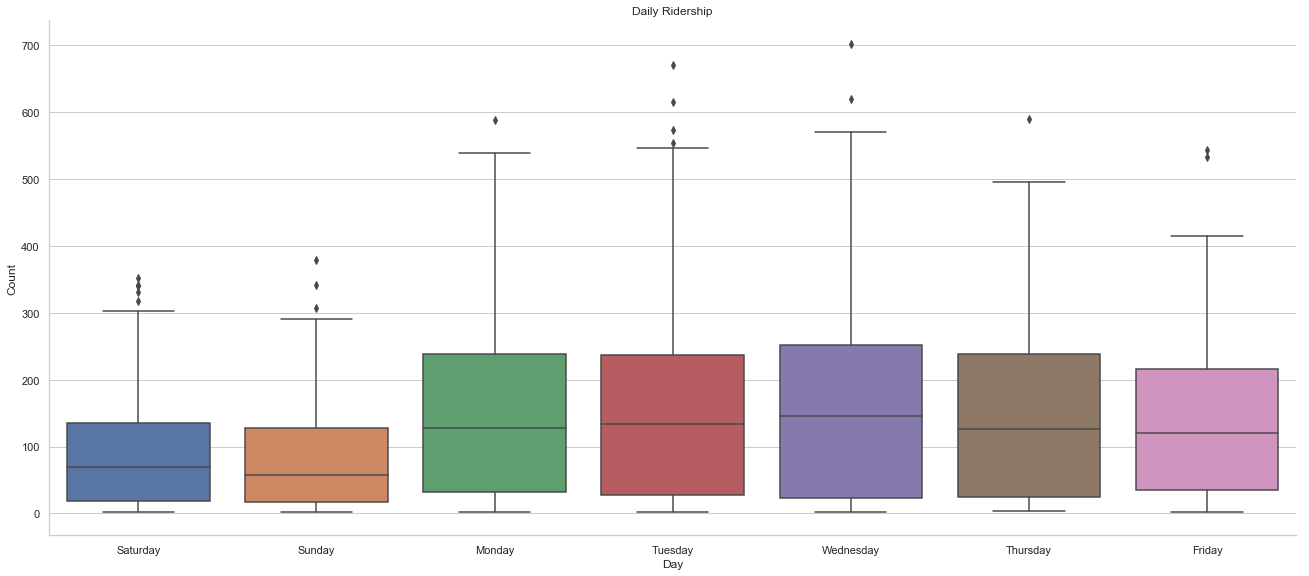

In [29]:
plt.figure(figsize=(16, 7))
sns.catplot(x="day_name", y="Count", data=ts, kind="box", height=8, aspect=float(16/7))
plt.xlabel("Day")
plt.ylabel("Count")
plt.title("Daily Ridership")

plt.show()

In [31]:
decompose = pd.DataFrame(ts.Count)
decompose.index = ts.index
decompose.head(10)


,Count
Datetime,
2012-08-25,3.166667
2012-08-26,3.666667
2012-08-27,2.583333
2012-08-28,2.416667
2012-08-29,2.500000
2012-08-30,3.083333
2012-08-31,3.250000
2012-09-01,4.666667
2012-09-02,4.916667


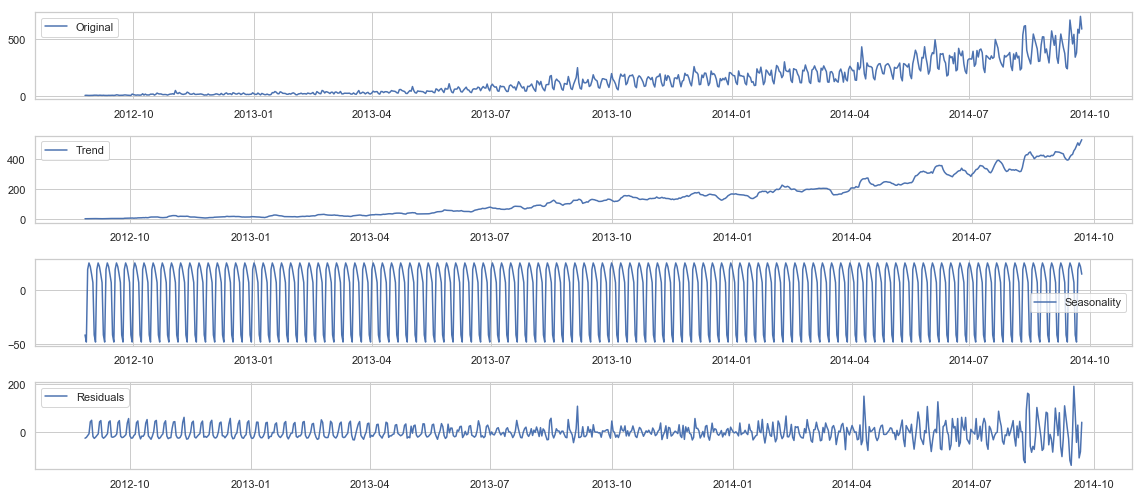

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(decompose)


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(16, 7))
plt.subplot(411)
plt.plot(ts["Count"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\bhara\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.


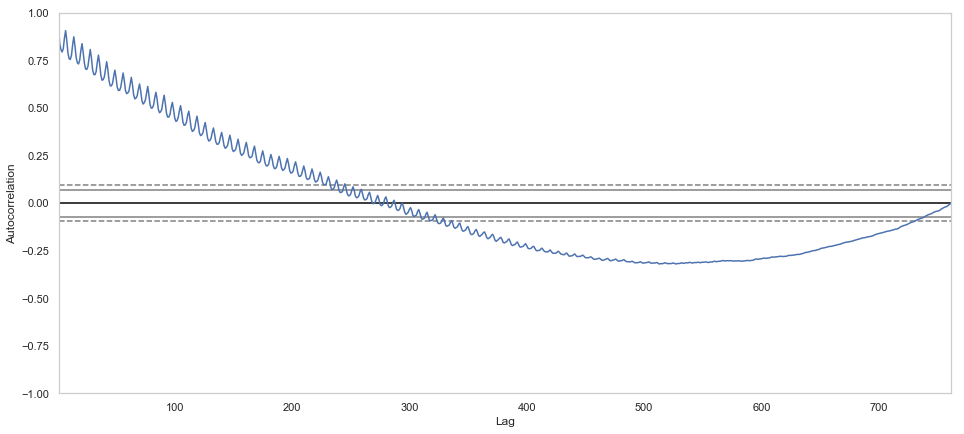

In [33]:
from pandas.tools.plotting import autocorrelation_plot
plt.figure(figsize=(16, 7))
plot_lags= 25
autocorrelation_plot(decompose.Count)


Test Statistic                   2.986351
p-value                          1.000000
#Lags Used                      20.000000
Number of Observations Used    741.000000
Critical Value (1%)             -3.439206
Critical Value (5%)             -2.865448
Critical Value (10%)            -2.568851
dtype: float64


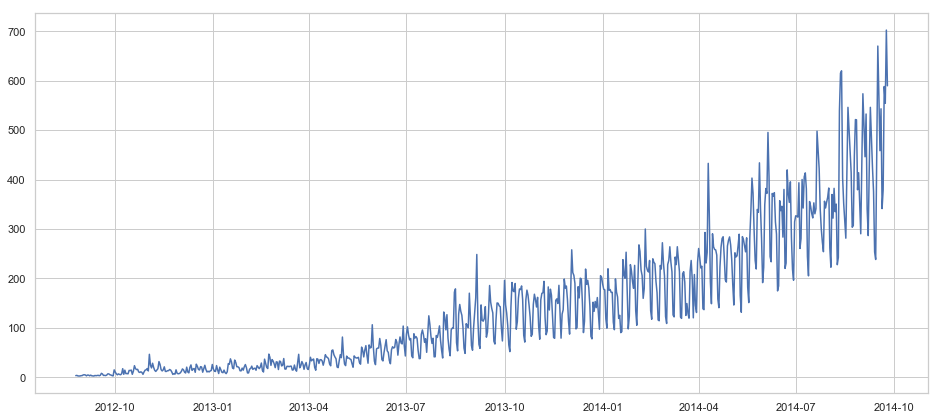

In [34]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(data):
    dftest = adfuller(data.Count, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    plt.figure(figsize=(16, 7))
    plt.plot(data.index, data.Count)
    plt.show()

stationarity_test(decompose)
#if Test statistic is  low as compare to critical levels, so getting info that series is stationary

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(decompose,test_size=0.25,shuffle=False)

In [31]:
## AR Model p=1, d=1, q=0 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(decompose,test_size=0.25,shuffle=False)

In [38]:
x_train.shape
#x_test.shape

(571, 1)

In [39]:
x_test.shape

(191, 1)

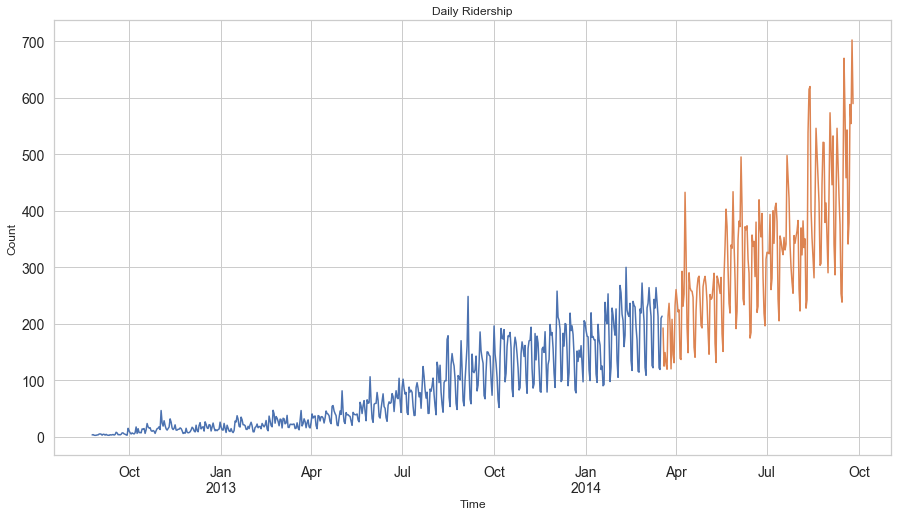

In [40]:
#Plotting data
x_train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
x_test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Daily Ridership")

plt.show()

Test Statistic                  -1.986116
p-value                          0.292694
#Lags Used                      15.000000
Number of Observations Used    555.000000
Critical Value (1%)             -3.442187
Critical Value (5%)             -2.866762
Critical Value (10%)            -2.569551
dtype: float64


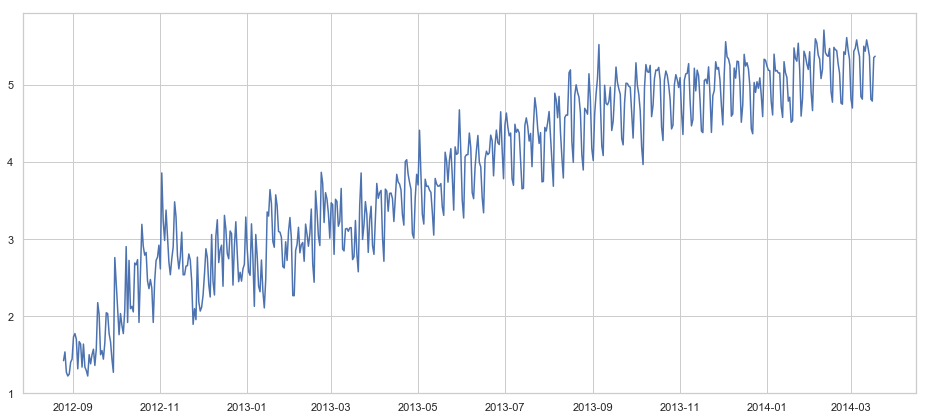

In [42]:
import math
## Now take the log (To make variance constant) and check for stationary again 
log_train = x_train
log_train = log_train["Count"].apply(lambda x: math.log(x+1))
log_train = pd.DataFrame(log_train)
stationarity_test(log_train)

Test Statistic                -7.740298e+00
p-value                        1.066351e-11
#Lags Used                     1.900000e+01
Number of Observations Used    5.510000e+02
Critical Value (1%)           -3.442274e+00
Critical Value (5%)           -2.866800e+00
Critical Value (10%)          -2.569571e+00
dtype: float64


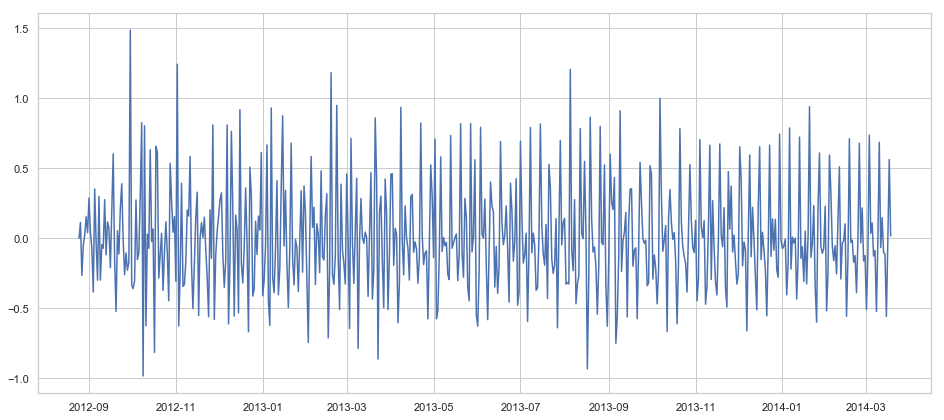

In [43]:
first_diff = log_train["Count"] - log_train["Count"].shift(1)
first_diff = first_diff.fillna(0)
first_diff = pd.DataFrame(first_diff)
stationarity_test(first_diff)

Test Statistic                -7.218912e+00
p-value                        2.136764e-10
#Lags Used                     1.400000e+01
Number of Observations Used    5.560000e+02
Critical Value (1%)           -3.442166e+00
Critical Value (5%)           -2.866752e+00
Critical Value (10%)          -2.569546e+00
dtype: float64


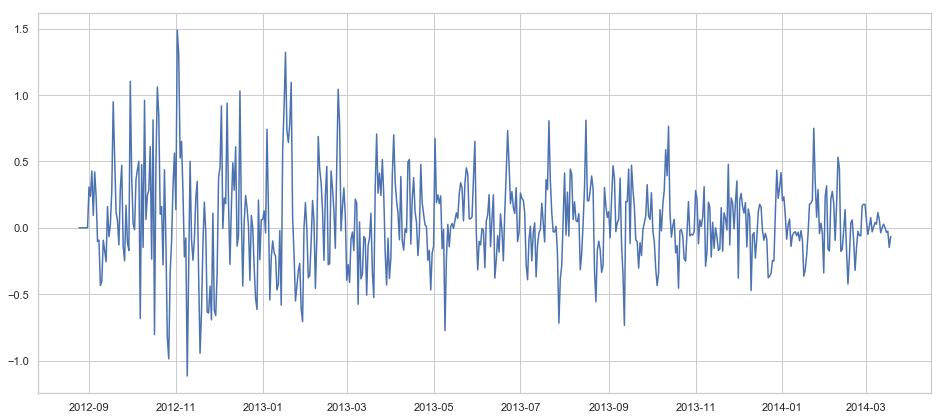

In [44]:
seasonal_data_differenced = log_train["Count"] - log_train["Count"].shift(7)
seasonal_data_differenced = seasonal_data_differenced.fillna(0)
seasonal_data_differenced = pd.DataFrame(seasonal_data_differenced)
stationarity_test(seasonal_data_differenced)

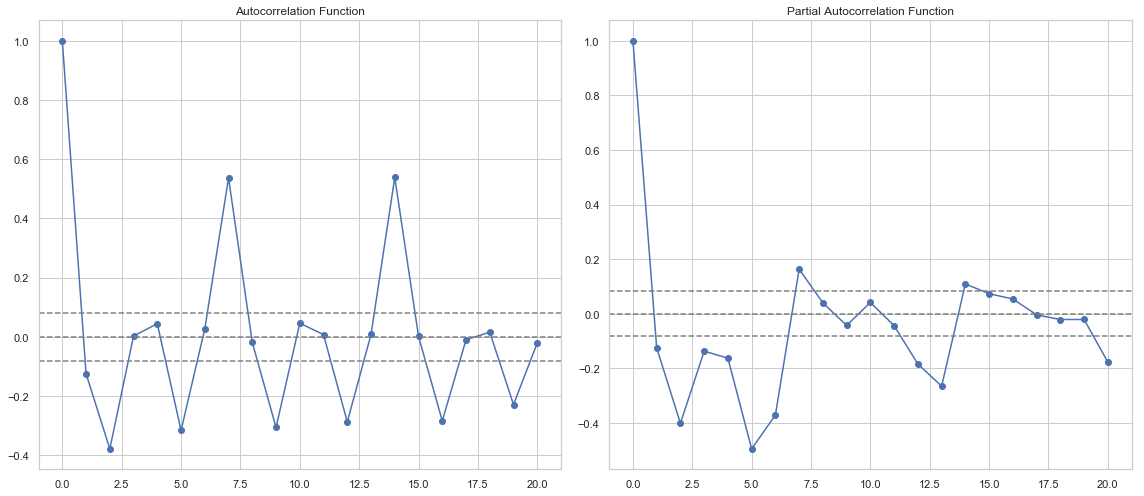

In [45]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(first_diff, nlags=20)
lag_pacf = pacf(first_diff, nlags=20, method='ols')

plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [46]:
## AR Model p=1, d=1, q=0 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(1, 1, 0))  
results_AR = model.fit(disp=-1) 

C:\Users\bhara\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\bhara\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\bhara\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

170.32961867388315


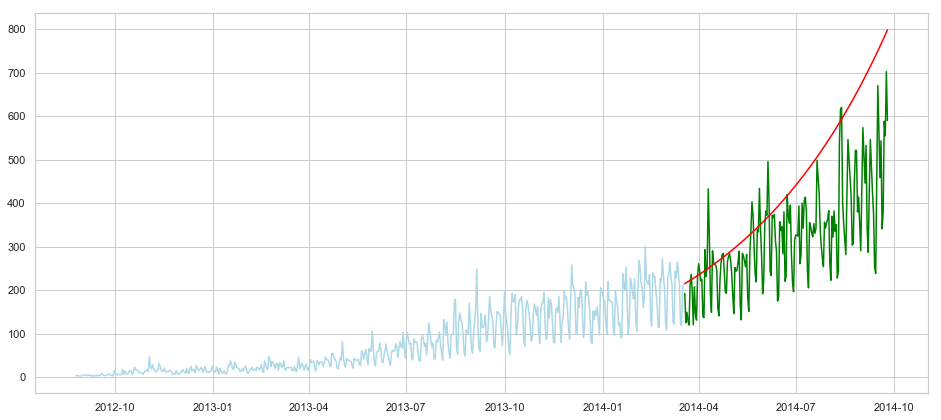

In [47]:
from sklearn.metrics import mean_squared_error
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.Count, color="lightblue")
plt.plot(x_test.index, x_test.Count, color="green")
## Forecasting 
pred = pd.DataFrame(results_AR.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.Count, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

133.40626753144164


C:\Users\bhara\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


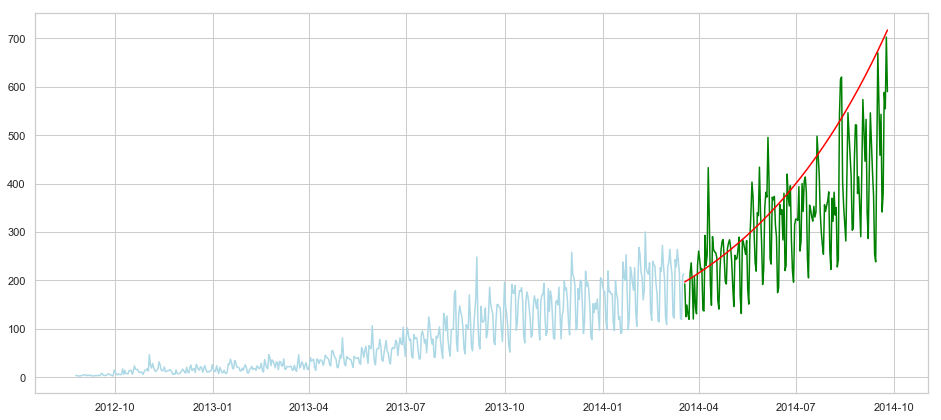

In [48]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  


plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.Count, color="lightblue")
plt.plot(x_test.index, x_test.Count, color="green")

## Forecasting 
pred = pd.DataFrame(results_MA.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.Count, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

121.66027910600069


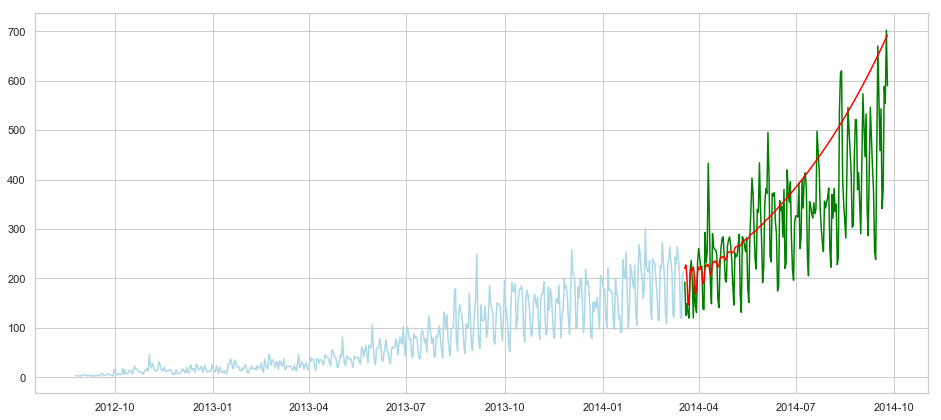

In [49]:
## MA Model p=0, d=1, q=1 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(7, 1, 1))  
results_MA = model.fit(disp=-1)  


plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.Count, color="lightblue")
plt.plot(x_test.index, x_test.Count, color="green")

## Forecasting 
pred = pd.DataFrame(results_MA.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.Count, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

In [50]:
from statsmodels.tsa.statespace import sarimax
mod = sarimax.SARIMAX(log_train.Count, trend='n', order=(7,1,1), seasonal_order=(7,1,1,7))
results = mod.fit(disp=-1)

C:\Users\bhara\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


106.14640239008509


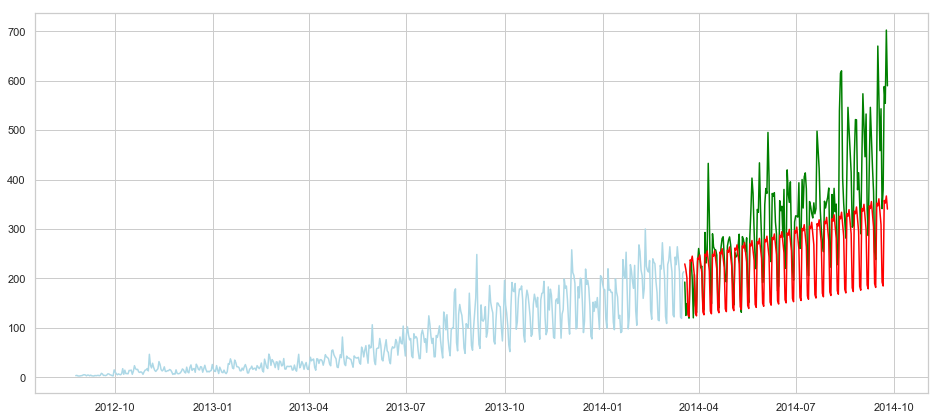

In [51]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.Count, color="lightblue")
plt.plot(x_test.index, x_test.Count, color="green")

## Forecasting 
pred = pd.DataFrame(results.forecast(len(x_test)))
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.Count, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

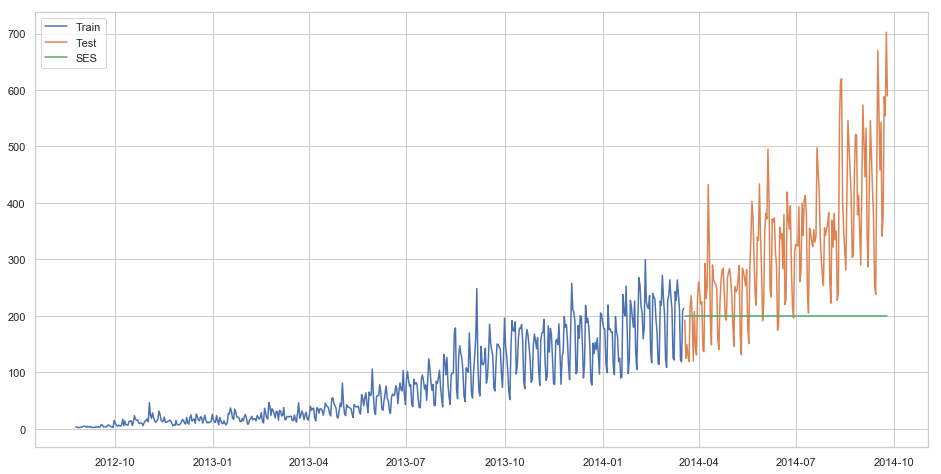

In [52]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = x_test.copy()
fit2 = SimpleExpSmoothing(np.asarray(x_train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(x_test))
plt.figure(figsize=(16,8))
plt.plot(x_train['Count'], label='Train')
plt.plot(x_test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(x_test.Count, y_hat_avg.SES))
print(rms)


169.04357776589418


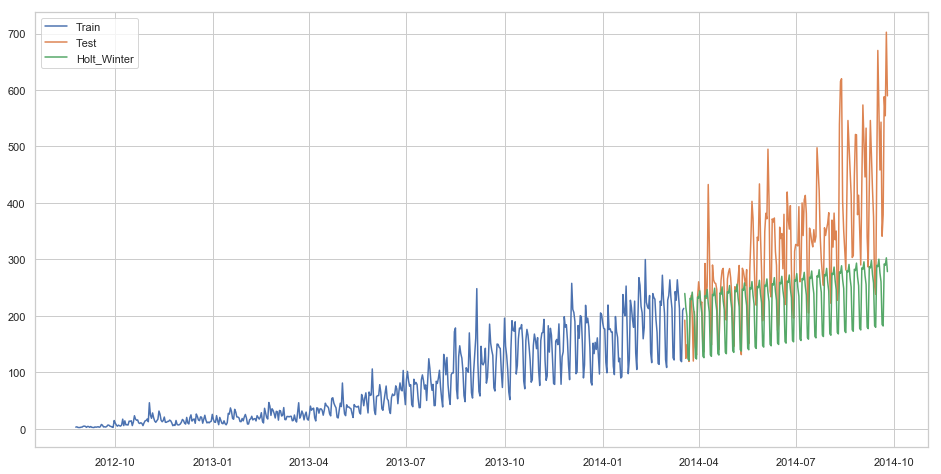

In [55]:
y_hat_avg = x_test.copy()
fit1 = ExponentialSmoothing(np.asarray(x_train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(x_test))
plt.figure(figsize=(16,8))
plt.plot( x_train['Count'], label='Train')
plt.plot(x_test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()


In [56]:
rms = sqrt(mean_squared_error(x_test.Count,y_hat_avg['Holt_Winter'] ))
print(rms)

129.3865775820206


129.3865775820206


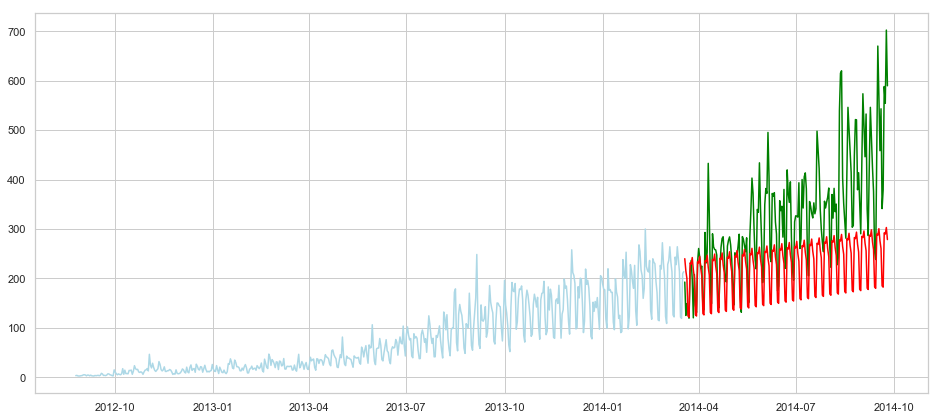

In [57]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.Count, color="lightblue")
plt.plot(x_test.index, x_test.Count, color="green")

ets_stl = ExponentialSmoothing(x_train['Count'] ,seasonal_periods=7 ,trend='add', seasonal='add').fit()
## Forecasting 
pred = pd.DataFrame(ets_stl.forecast(len(x_test)))
pred.columns = ["yhat"]
pred.index = x_test.index

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.Count, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

193.2065366628071


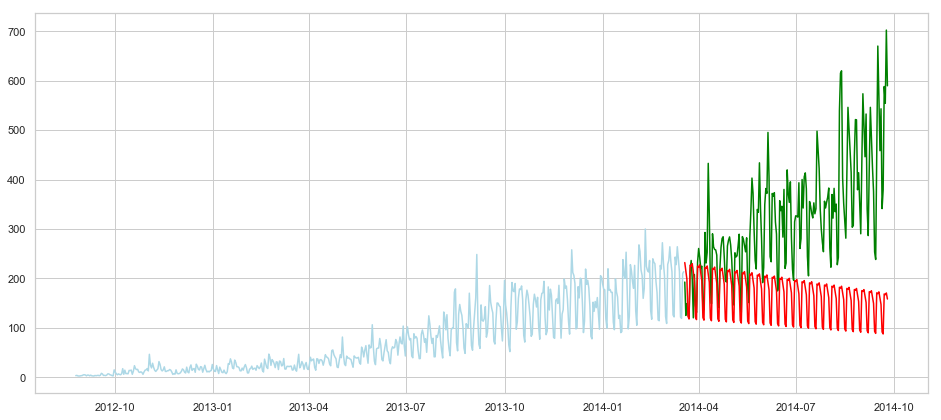

In [58]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.Count, color="lightblue")
plt.plot(x_test.index, x_test.Count, color="green")

ets_stl = ExponentialSmoothing(x_train['Count'] ,seasonal_periods=7 ,trend='add', seasonal='mul').fit()
## Forecasting 
pred = pd.DataFrame(ets_stl.forecast(len(x_test)))
pred.columns = ["yhat"]
pred.index = x_test.index

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.Count, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

63.887965653668005


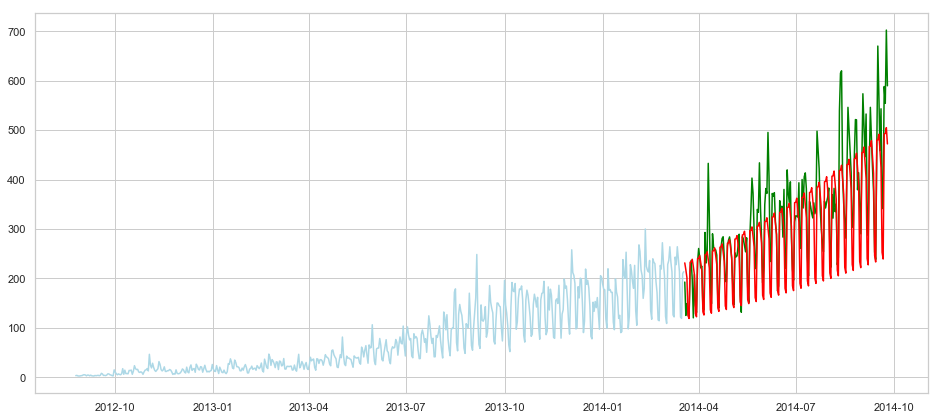

In [59]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.Count, color="lightblue")
plt.plot(x_test.index, x_test.Count, color="green")

ets_stl = ExponentialSmoothing(x_train['Count'] ,seasonal_periods=7 ,trend='add', seasonal='mul').fit(use_boxcox=True)
## Forecasting 
pred = pd.DataFrame(ets_stl.forecast(len(x_test)))
pred.columns = ["yhat"]
pred.index = x_test.index

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.Count, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()